### **Análise exploratória da base dados IMDB que contém avaliação de filmes**

#### Importando as funções necessárias para a análise


In [1]:
import sys
sys.path.append('/home/guilherme/AIEnvironment/SentimentAnalysis/src/data_preparation')
from data_exploration import load_data, distribuition_plot, reviews_statistic

#### **Carregando a base de dados**

In [2]:
df = load_data("/home/guilherme/AIEnvironment/SentimentAnalysis/data/raw/imdb-reviews-pt-br.csv")
df.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


#### Analisando informações gerais da base de dados

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49459 entries, 0 to 49458
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         49459 non-null  int64 
 1   text_en    49459 non-null  object
 2   text_pt    49459 non-null  object
 3   sentiment  49459 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


#### Primeiras análises

A base de dados é composta por quase 50 mil análises de filmes, 4 colunas, sendo as mais importantes: text_en, text_pt e sentiment.

 Para as análises que serão feitas, a coluna text_en será a única considerada, pois é a que contém a avaliação do filme em inglês, sendo um processo de tratamento de texto mais simples, visto que em português perde-se muita informação devido os acentos e caracteres especiais.

#### Eliminando tudo que não será usado para as análises

Não serão necessárias colunas id text_pt.

In [4]:
df.drop(['id', 'text_pt'], axis =1, inplace=True)

#### Renomeando as colunas para melhor leitura

In [5]:
df.rename(columns = {'text_en': 'Reviews', 'sentiment': 'Sentiment'},
          inplace=True)

#### Visualizando com as alterações feitas

In [6]:
df.head()

,Reviews,Sentiment
0,Once again Mr. Costner has dragged out a movie...,neg
1,This is an example of why the majority of acti...,neg
2,"First of all I hate those moronic rappers, who...",neg
3,Not even the Beatles could write songs everyon...,neg
4,Brass pictures movies is not a fitting word fo...,neg


#### Analisando a distribuição das avaliações

Pode-se perceber que as avaliações entre positivo e negativo encontram-se bem balanceadas, portanto, não será necessário realizar tratamento de balanceamento de classes.

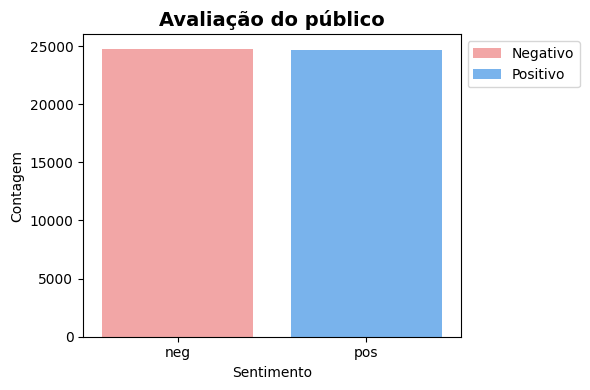

In [7]:
distribuition_plot(df, 'Sentiment')

A contagem dos valores das avaliações confirma a distribuição balanceada.

In [16]:
neg, pos = round(df['Sentiment'].value_counts()/df['Sentiment'].value_counts().sum(), 3)*100
print(f'Avaliações negativas: {neg}%',
      f'Avaliações positivas: {pos}%', sep='\n')

Avaliações negativas: 50.1%
Avaliações positivas: 49.9%


#### Analisando o tamanho das avaliações

In [17]:
reviews_statistic = reviews_statistic(df)

In [18]:
reviews_statistic

,Valor
Estatísticas,
Média,1228.48
Desvio Padrão,852.18
Mínimo,32.00
Máximo,5000.00


Os valores acima mostram os comprimentos das avaliações, percebe-se que os comprimentos mínimos e máximos das avaliações são bem discrepantes, logo, não há um padrão de tamanho para as avaliações, o que se constata com o desvio padrão extremamente alto.

#### Substituindo as avaliações positivas e negativas por 1 e 0, respectivamente.

In [19]:
df.Sentiment = df.Sentiment.replace({'pos': 1, 'neg': 0})

In [21]:
df.Sentiment.value_counts()

Sentiment
0    24765
1    24694
Name: count, dtype: int64

#### Salvando dataset processado

In [11]:
df.to_csv("/home/guilherme/AIEnvironment/SentimentAnalysis/data/processed/df_imdb.csv", index=False)